<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Feature Engineering

_Authors: Matt Brems (DC), Riley Dallas(AUS)_

---

## Review of Linear Regression
---

- Linear regression is a way for us to relate some *dependent* variable $Y$ to *independent* variables $X_1$,$\ldots$,$X_p$.
- We might write this out in one of the following two forms:
$$
\begin{eqnarray}
Y &=& \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p +\varepsilon\\
\mathbf{Y} &=& \mathbf{X \beta + \varepsilon}
\end{eqnarray}
$$

<details><summary>
There are four assumptions (LINE) to the simple linear regression model and five assumptions (LINEM) to the multiple linear regression model. Let's recap what are those?
</summary>
1. **Linearity:** $Y$ is linearly related to $X_i$ for all $i$.<br>
2. **Independence:** Each residual $\varepsilon_i$ is independent of $\varepsilon_j$ for all $i\neq j$.<br>
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.<br>
4. **Equality of Variance:** The errors (residuals) should have a roughly consistent pattern, regardless of the value of $X_i$. (There should be no discernible relationship between $X_i$ and the residuals.)<br>
5. **Independence Part II:** $X_i$ is independent of $X_j$ for all $i\neq j$.
</details>

We can measure the performance of our model by using metrics like mean squared error (MSE).

## Feature Engineering
---

- If I use straight line distance (as the crow flies) between two locations, my estimated time of arrival in a taxi is going to be pretty bad.
- If I put text into my model without some sort of preprocessing, my computer isn't going to understand how to handle it.

Suffice it to say: **If your features (variables) _aren't good_, your predictions and inferences _won't be good too_!**

#### What is feature engineering?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

**Feature engineering** is the term broadly applied to the ***creation and manipulation of features (variables)*** used in machine learning algorithms. Like we saw on the 'interactions terms' deck. 

Unless we're working with the same data over and over again, _this isn't something we can automate_. It will require **creativity and a good, thorough understanding of our data** to effectively mould representative features that could potentially influence the response.

#### The Process of Data Science
1. Data Gathering
2. Data Cleaning/Manipulation
3. EDA
4. Modeling
5. Reporting

Feature engineering may spread across all five of these steps, but mostly focus on _steps 2 and 3_.

#### [The Process of Feature Engineering](https://www.youtube.com/watch?v=drUToKxEAUA)
1. Brainstorming or testing features.
2. Deciding what _new_ features to create from _existing_.
3. Creating features.
4. Checking how the _created_ features work with your model - does it improve signal (legitimate relation between response, features).
5. Improving features (if needed).
6. Return to step 1.
7. "Do data science!"

# Code practise

The tasks for you to code along will be in ***bold italics***

## Importing Libraries
---

We'll need the following libraries for today's lesson: 

***(Following the guide below, write the required imports in your starter-code notebook)***

1. `pandas`
2. `numpy`
3. `seaborn`
4. `train_test_split` and `cross_val_score` class from `sklearn`'s `model_selection` module
5. `LinearRegression` class from `sklearn`'s `linear_model` module
6. `StandardScaler` and `PolynomialFeatures` class from `sklearn`'s `preprocessing` module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Load the Data

---

Today's dataset (`Advertising.csv`) is from the [ISLR website](https://statlearning.com). It has been parked inside your `datasets` folder within 3.05.

***Load the csv file into a dataframe, df and Drop `Unnamed: 0` once you've loaded the csv into a `DataFrame`.***

In [2]:
df = pd.read_csv('../datasets/Advertising.csv')
df.drop(columns='Unnamed: 0', inplace=True)
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Create our features matrix (`X`) and target vector (`y`)
---

The following columns will be our features:
- `TV`
- `radio`
- `newspaper`

The `sales` column is our target; the column we're trying to predict.

***In the cell below, create your `X` and `y` variables.***

In [3]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

## Linear Regression model
---

***In the cell below, create/instatiate a `LinearRegression` model.***

In [4]:
lr = LinearRegression()

## Baseline score
---

***In the cell below, use `cross_val_score` to get a baseline $R^2$ for our model.***

Note: a Kfold = 5 is used for cv by default

In [5]:
cross_val_score(lr, X, y).mean()

0.8871063495438436

## Interaction terms
---

Imagine seeing a commercial on TV, and then hearing a commercial by the same company a few days later on radio. If you eventually purchase the product in question, was it the TV spot that swayed you or the radio commercial...or was a it a synergy of the two commercials that did the trick?

Interaction terms allow us to see what effect the **combination** of multiple features have on our label. For example, I'm not a fan of plain pancakes, and I never eat maple syrup by itself. But I do enjoy both combined together!

Let's create an interaction term for this dataset, by doing a pairwise multiplication of two features as below:
```python
df['Interaction Col'] = df['Column 1'] * df['Column 2']
```

***In the cell below, create an interaction column between `TV` and `radio`.***

In [6]:
df['TV*radio'] = df['TV'] * df['radio']
print(df.shape) # check effect on df from newly included col
df.head()

(200, 5)


,TV,radio,newspaper,sales,TV*radio
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


## EDA: Create a heatmap
---

***In the cell below, create a heatmap in `seaborn` to show how our `TV*radio` interaction term correlates to all the other columns. Share what are your inferences from there.***

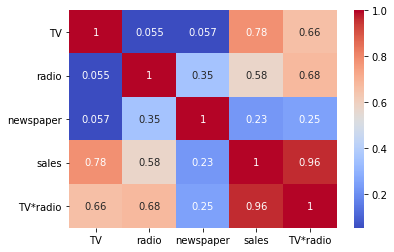

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

<details><summary>
What are your inferences from the heatmap?
</summary>
    
1. our newly created feature, `TV*radio` is strongly correlated with our response, sales!
    
    - more stronger than individual feature correlations from `TV` and `radio` to the response
    
2. obviously enough, the individual features, `TV` and `radio` correlate with the interaction feature `TV*radio`
</details>

## EDA: Pairplot
---

***Now use `seaborn`'s `.pairplot()` method to create scatterplots with our new feature column.***

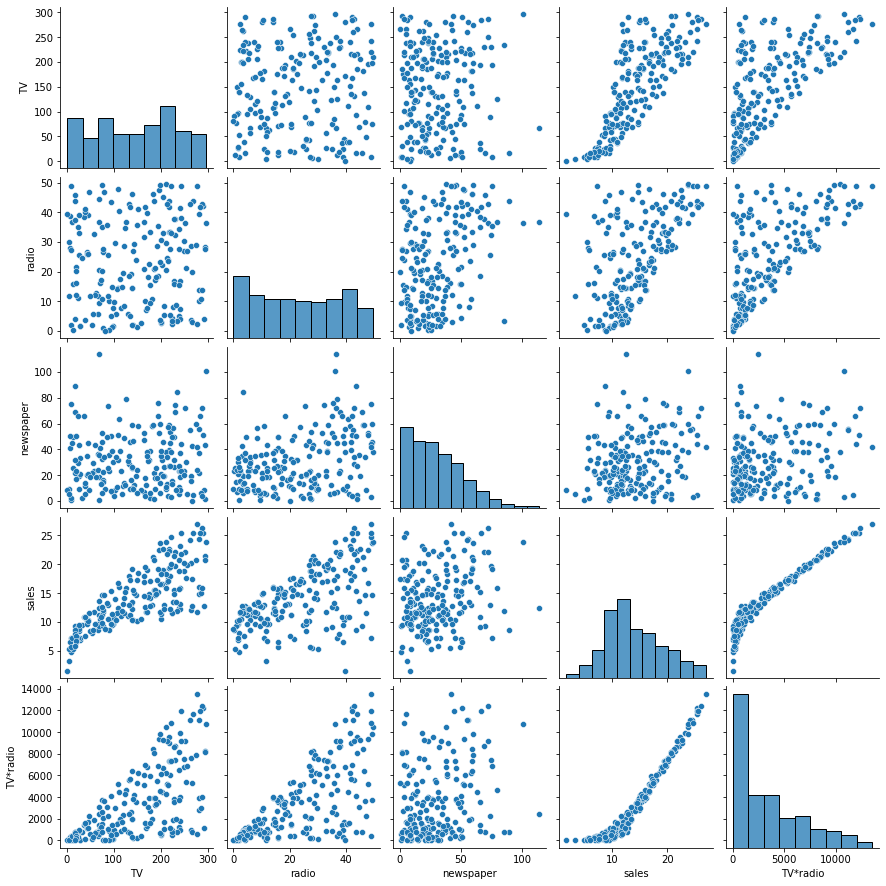

In [8]:
sns.pairplot(df);

We can look at row#4 of the Multi-plot grid above with `sales` response on y-axis and the different features along the x-axis. column#5 or subplot (4,5) showing `sales` vs `TV*radio` shows strong correlation.

## Create our features matrix (`X`) and target vector (`y`)
---

Now that we have confirmed that our new column is highly correlated to our label, let's incorporate it in our features matrix and evaluate our model metrics again to check for potential improvement:
- `TV`
- `radio`
- `newspaper`
- `TV*radio` interaction term

The `sales` column is our label: the column we're trying to predict.

***In the cell below, refresh your `X` matrix to include the new feature `TV*radio`.***

In [9]:
# lets recap what's in features --> its a list we created with the list of feature columns
# how do you add a new item to a list?
features

['TV', 'radio', 'newspaper']

In [10]:
# append new feature
features.append('TV*radio')
X = df[features]
X.head()

,TV,radio,newspaper,TV*radio
0,230.1,37.8,69.2,8697.78
1,44.5,39.3,45.1,1748.85
2,17.2,45.9,69.3,789.48
3,151.5,41.3,58.5,6256.95
4,180.8,10.8,58.4,1952.64


## Model evaluation
---

Use `cross_val_score` to see how much our new feature moves the $R^2$ score.

In [11]:
cross_val_score(lr, X, y).mean()

0.9641704265806474

### Conclusion: we see significant improvement in $R^2$ vs before (0.89 vs 0.96)

## `PolynomialFeatures`
---

Congrats! We struck gold on our first interaction term. The question now is how do we create interaction terms **in bulk**? In our small dataset, we only had three interaction terms, so a manual approach was still acceptable:

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

However, with larger datasets, manually creating interaction terms would quickly become unsustainable. That's where `sklearn`'s `PolynomialFeatures` comes in. `PolynomialFeatures`([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) will generate a new feature matrix with polynomial and interaction features. For a 2-D input feature sample [a, b], the generated features using this approach would be: [1, a, b, a^2, ab, b^2]. 

Thus for our advertising dataset, this will return 9 columns from our original features matrix of the form [a, b, c]:

1. _original_ `TV` column
2. _original_ `radio` column
3. _original_ `newspaper` column
4. _new_ `TV^2` (`TV` squared)
5. _new_ `radio^2` (`radio` squared)
6. _new_ `newspaper^2` (`newspaper` squared)
7. _new_ `TV*radio` interaction
8. _new_ `TV*newspaper` interaction
9. _new_ `radio*newspaper` interaction

In the cells provided, use `PolynomialFeatures` to transform `X`. **NOTE**: You'll need to set `include_bias=False`, because if set to `True`, this will create a column for intercept, which we know isn't required for scikit-learn.

***First, let's reset`features` to how it was BEFORE including `TV*radio`. How can we remove a list item?***

In [12]:
features.remove('TV*radio')
X = df[features]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
# automatically generating the polynomial (high-order) & interaction features
# we are creating an object 'poly' from the PolynomialFeatures class
# similar to instantiating linear regression estimator
poly = PolynomialFeatures(include_bias=False)

In [14]:
# following instantiation, instead of our usual .fit(), we'll call .fit_transform()
# fit_transform() --> fits data, then transforms it
X_poly = poly.fit_transform(X)

# X_poly is a list-of-lists with each 9 transformed feature values
# printing row 1 as sample preview to compare vs X pre-transformation
print(f'pre-X: {X.iloc[1].values}')
print(f'post-X: {X_poly[[1]]}') 

pre-X: [44.5 39.3 45.1]
post-X: [[  44.5    39.3    45.1  1980.25 1748.85 2006.95 1544.49 1772.43 2034.01]]


##### The resulting additional terms shown in `X_poly` are generated based on a^2, b^2, c^2, ab, bc, ca]

In [15]:
# we can also view X_poly in a DataFrame
pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


## Model evaluation
---

***Use `cross_val_score` to see how much `PolynomialFeatures` affects the $R^2$ score. What should we modify in our cross_val_score parameters?***

In [16]:
# replacing X --> X_poly
cross_val_score(lr, X_poly, y, cv=5).mean()

0.9842540981580085

## Scaling
---

Throughout this course, we'll encounter several models that require you to **scale your data prior to modeling**. Imagine you were trying _predict the price of a house_, and you had _two features: square footage and number of bedrooms_. These two features are on _different scales_, separated by a few orders of magnitude (square footage is in the hundreds or even thousands and number of bedrooms is in the single digits). 

When we scale our data, we essentially convert our columns into Z-scores. 

### $z$ = ${x- \mu \over \sigma}$

Recall $\mu$ is the mean and $\sigma$ is the standard deviation

In our dataset, let's scale the `TV` column manually using this formula.

In [17]:
df['TV'].head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [18]:
((df['TV'] - df['TV'].mean()) / df['TV'].std(ddof=0)).head()
# To have the same behaviour as `numpy.std`, use `ddof=0`, `ddof=1` is default in pandas

0    0.969852
1   -1.197376
2   -1.516155
3    0.052050
4    0.394182
Name: TV, dtype: float64

[Additional reference](https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results) for std dev calculation: numpy vs pandas - former computes `population` std dev, while latter computes `sample` std dev
- the difference in denominator of std dev formula for `population` std dev (N) vs the latter `sample` std dev (N - 1) in statistics is in order to get an unbiased estimator for population standard deviation when calculating it from the sample by using (N - 1). This is called **one degree of freedom, we subtract 1 in order to get an unbiased estimator.**

## `StandardScaler`
---

Rather than doing this manually for each column, `sklearn` has a `StandardScaler` class that allows us to **automatically scale our entire dataset in a few lines of code.**

In [20]:
ss = StandardScaler() # instantiate
X_scaled = ss.fit_transform(X) # fit and transform (scale) X
X_scaled[0, :] # preview post-scaling output from 0th row and all cols

array([0.96985227, 0.98152247, 1.77894547])

## Concept revision - Dummies
---

When we dummy a column, we're converting a **categorical column** into a ***one-hot encoded*** matrix. `pandas` allows us to do this with the `pd.get_dummies()` method.

In [39]:
# import forestfires dataset
fires = pd.read_csv('../datasets/forestfires.csv')
print(fires.shape)
fires.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [41]:
# one-hot encoding categorical column, 'day' using pd.get_dummies()
pd.get_dummies(fires[['day']])

,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0
